# Exploratory Data Analysis

## Conquering Earth by Phone

It's the year 3000 and we're in the Futurama universe. Per usual, Lrrr has been up to no good. Scheming, he had a breakthrough. He will use Earth's telephone services to recruit an army to conquer the planet. Unfortunately, he has many people leaving his service and joining competitors. To carry out his plan, he needs to get a better understanding of what is causing people to leave, and he will do this by employing an analyst.

![Lrr the Conquerer](https://i.ytimg.com/vi/BYhF79vIlws/hqdefault.jpg)

We want to know why customers are leaving, and luckily we have data on these customers' habits: whether they subscribed to the international plan, how much they talk during day, evening, and night, their charges, their use of voicemail. By using summaries and graphics, we will become more familiar with the data and how they interact with each other, and how some variables (like how many times a customer calls customer service) influences the rate at which people leave our service.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn
seaborn.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = 7, 7

In [3]:
data = pd.read_csv("churn.txt")

## Summary of the Data

At the start of an analysis, sometimes the analyst has some hypothesis about the relationships of two (or more) variables. But, sometimes they don't, so exploratory analyses are helpful for exploring the data to see possible trends or peculiarities. One might see associations, outliers, or other interesting things by using summaries (as below), or graphics. Looking at the *Area Code* field, there are only two area codes displayed for five different states, which points to issues with that variable. Though not shown in this notebook, Pandas provides another useful summary tool that visualizes where data is missing. This kind of information can be useful when we want to clear out unneeded data that ties up memory. Summaries allow us to sort of verify the integrity of the data, too.

In [4]:
print(data.head())

  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0    

In [5]:
summary = data.describe()

In [6]:
summary = summary.transpose()

In [7]:
print(summary.head())

                 count        mean        std    min    25%    50%    75%  \
Account Length  3333.0  101.064806  39.822106    1.0   74.0  101.0  127.0   
Area Code       3333.0  437.182418  42.371290  408.0  408.0  415.0  510.0   
VMail Message   3333.0    8.099010  13.688365    0.0    0.0    0.0   20.0   
Day Mins        3333.0  179.775098  54.467389    0.0  143.7  179.4  216.4   
Day Calls       3333.0  100.435644  20.069084    0.0   87.0  101.0  114.0   

                  max  
Account Length  243.0  
Area Code       510.0  
VMail Message    51.0  
Day Mins        350.8  
Day Calls       165.0  


In [8]:
print(len(data['Churn?']))

3333


In [9]:
#To get the proportions of churn
prop_churn = sum(data['Churn?'] == "True.") / len(data['Churn?'])
print(prop_churn)

0.144914491449


There are 3,333 customer records in this dataset, and 14% of these customers have churned, or dropped their phone service to instead go with a competitor.

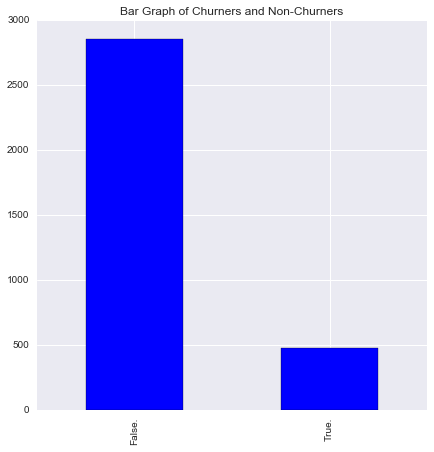

In [10]:
#This creates a bar graph of churn (true vs. false)
data['Churn?'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Churners and Non-Churners', color = 'blue', align = 'center')
plt.show()

When observing categorical variables, it is often a useful practice to create contingency tables for distributions and marginal distributions, in this case, to quantify the relationship between Churn (T/F) and International Plan (Y/N). These can be graphed (and overlayed) to show proportions.

In [11]:
#Creates initial contingency table between Churn and International Plan
int_churn_contingency = pd.crosstab(data["Int'l Plan"], data["Churn?"])
print(int_churn_contingency)

Churn?      False.  True.
Int'l Plan               
no            2664    346
yes            186    137


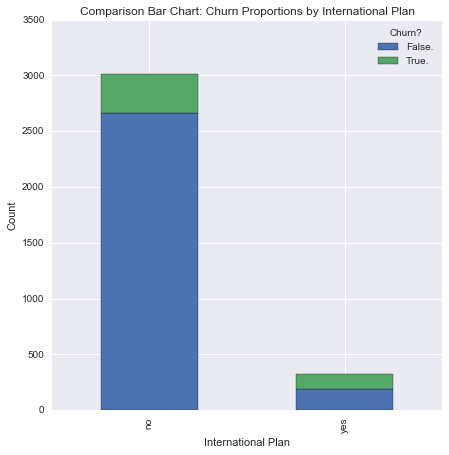

In [12]:
#Stacked Barplot of International Plan Use and Churn
int_churn_contingency.plot(kind = 'bar', stacked = 'true', title = "Comparison Bar Chart: Churn Proportions by International Plan")
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

Notably, there is a high rate of churn in customers that have the international calling plan.

In [13]:
#Table of Sums for Both Variables
int_churn_sums = pd.crosstab(data["Int'l Plan"], data["Churn?"], margins = True)
print(int_churn_sums)

Churn?      False.  True.   All
Int'l Plan                     
no            2664    346  3010
yes            186    137   323
All           2850    483  3333


In [14]:
#Table of proportions
int_churn_props = int_churn_sums / int_churn_sums.ix["All", "All"]
print(int_churn_props)

Churn?        False.     True.      All
Int'l Plan                             
no          0.799280  0.103810  0.90309
yes         0.055806  0.041104  0.09691
All         0.855086  0.144914  1.00000


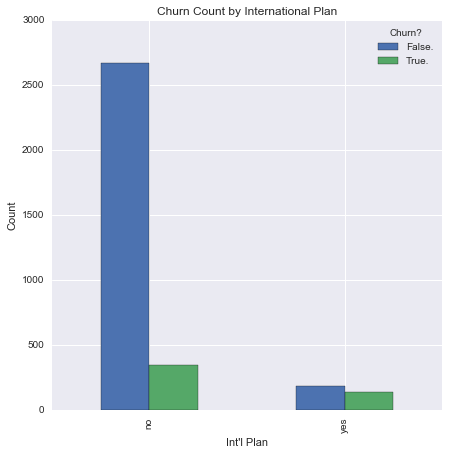

In [15]:
#Clustered bar graph; churn by international
int_churn_contingency.plot(kind = 'bar', legend = True)
plt.ylabel('Count')
plt.title('Churn Count by International Plan')
plt.show()

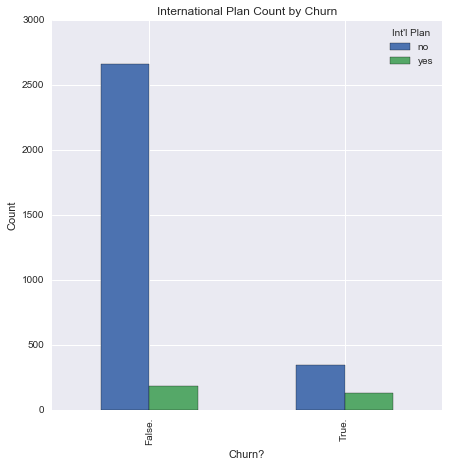

In [16]:
#Clustered bar graph; international by churn. Legend in book is wrong.
inverted_contingency = pd.crosstab(data["Churn?"], data["Int'l Plan"])
inverted_contingency.plot(kind = 'bar', legend = True)
plt.ylabel('Count')
plt.title('International Plan Count by Churn')
plt.show()

Now that the relationship between international plan and churn has been explored a little bit, we can look to another variable: calls to customer service.

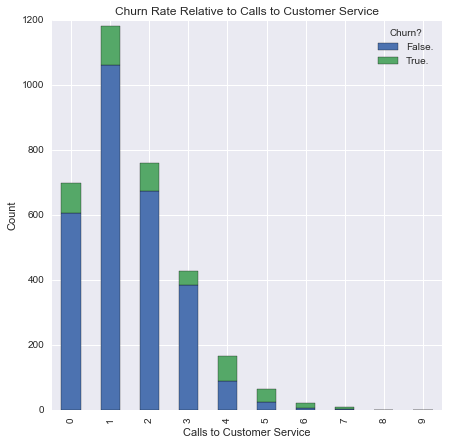

In [17]:
#Stacked Bar of Customer Service Calls and Churn
cust_serv_churn = pd.crosstab(data['CustServ Calls'], data['Churn?'])
cust_serv_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Calls to Customer Service')
plt.title('Churn Rate Relative to Calls to Customer Service')
plt.show()

This graph is interesting. Once a customer gets up to 4 customer service calls, the churn rate drastically increases. It is a little bit difficult to see churn for 7 or more customer service calls. Therefore, we can normalize the bar graph so that they're all equal height, but the proportions all remain the same. That way we can get a real grasp for what the churn rate is for the customers that make 7 or more customer service calls.

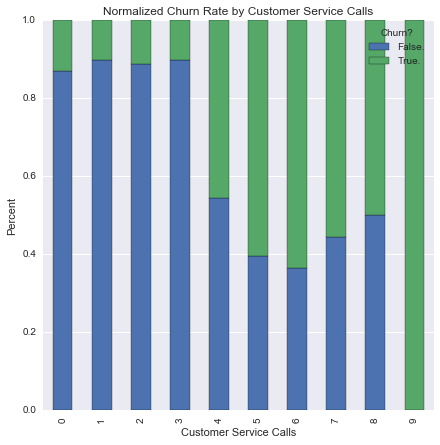

In [18]:
##https://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/matplotlib/matplotlib-applied.ipynb  ..This was tricky for me but I found this documentation to be useful.
cust_serv_churn_norm = cust_serv_churn.div(cust_serv_churn.sum(1).astype(float), axis = 0)
cust_serv_churn_norm.plot(kind = 'bar', stacked = True, title = "Normalized Churn Rate by Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Percent")
plt.show()

**Non-normalized histograms should always be provided with their normalized counterpart to show the full picture of the variable's distribution.**

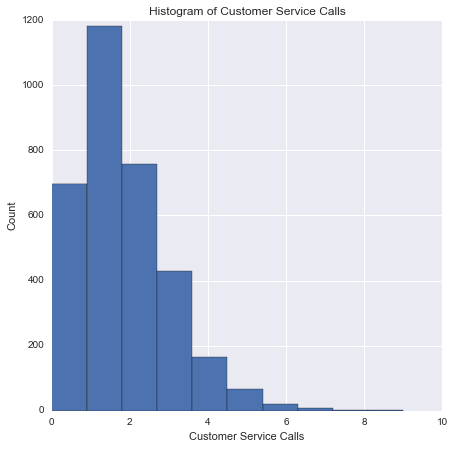

In [19]:
#Histogram of Customer Service Calls
plt.hist(data['CustServ Calls'])
plt.title("Histogram of Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Count")
plt.show()

## Multivariate Exploration

Univariate explorations don't catch everything, so sometimes it can be useful to explore multivariate relationships. For example, those with high evening minutes didn't have blatantly high churn rates, however, a scatterplot that plots day minutes vs. evening minutes shows that customers that have both high day minutes and high evening minutes churn at far greater rates.

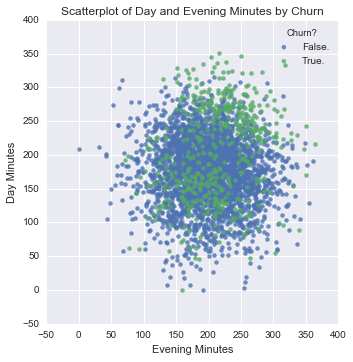

In [20]:
#Scatterplot of Evening Minutes and Day Minutes by Churn
seaborn.lmplot('Eve Mins', 'Day Mins', data = data, hue = 'Churn?', fit_reg = False, legend_out = False)
plt.title('Scatterplot of Day and Evening Minutes by Churn')
plt.xlabel("Evening Minutes")
plt.ylabel("Day Minutes")
plt.show()

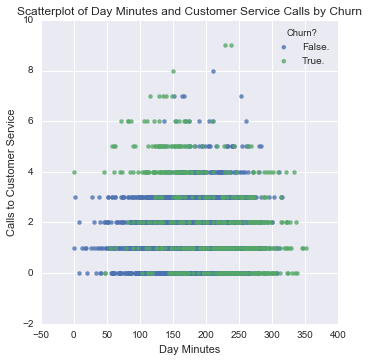

In [21]:
#Scatterplot of Day Minutes and Customer Service Calls by Churn
seaborn.lmplot('Day Mins', 'CustServ Calls', data = data, hue = 'Churn?', fit_reg = False, legend_out = False)
plt.title('Scatterplot of Day Minutes and Customer Service Calls by Churn')
plt.xlabel('Day Minutes')
plt.ylabel('Calls to Customer Service')
plt.show()

Multivariate explorations can yield insights about "interactions" and can uncover subsets of records that call for further investigation, like the area to the top left of the above plot that are low in day minutes but high in customer service calls. These differences can be quantified and flagged/targeted, e.g.: those with high customer service calls and low day minutes have a 65% probability of churning, whereas only 26% of customers with high customer service calls and high day minutes are churners. Thus, we can red-flag customers with high customer-service calls and low day minutes, because they are at risk of churning.

## Multicollinearity

In the exploratory phase, we should also check for multicollinearity in the predictor variables (basically the independent variables). Multicollinearity is a threat in large datasets, where it is likely that some predictor variables will be strongly correlated with each other, and this can increase the variance (or standard errors) of regression coefficients, counter-intuitively alter the magnitude or sign of a coefficient, or can make it appear that the regression model is descriptive, while the t-values may not be significant. In other words, it's important to be cautious of multicollinearity, as it would be unwise to make an inferences about the effects of a variable if we can't distinguish its effects from another variable's.

A scatterplot matrix is a quick (and not thorough) way of getting a glimpse of how different data might be related. In this case, we're observing the pairwise relationships between day minutes, day calls, and day charge. We can see that there seems to be a correlation between day charge and day minutes. Next steps would be to verify these relationships with regression analyses, and if we so choose, we can apply dimensionality-reduction methods to make sure the variables are independent of each other and useful.

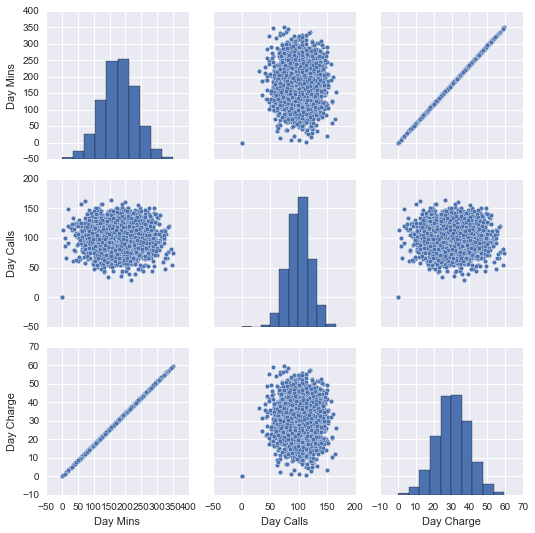

In [22]:
#Scatterplot Matrix
seaborn.pairplot(data = data, vars = ['Day Mins', 'Day Calls', 'Day Charge'])
plt.show()

Graphically exploring the variables—how they relate to the dependent variable, and how they relate to each other—has led to many insights about why customers are leaving Lrrr's phone service. Additionally, we've examined that multicollinearity is present in some variables. All of this will contribute to our model building process. We are now enabled to create a predictive model to warn us which customers are thinking about dropping our service, so that they can be flagged as at-risk and incentivized to stay. Lrrr will have to become a little more comfortable with the idea of *friendly* targeting.